In [1]:
# Importando  bibliotecas do python
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [14]:
#Importando os arquivos
cadastro_df = pd.read_csv('cadastro.csv')
gasolina_df = pd.read_csv('gasolina.csv')
salario_df = pd.read_csv('salario_profissao.csv')

cadastro_df['Quantidade'] = 1
cadastro_df['idade'] = 2020 - cadastro_df['ano_nascimento']


1 - Qual a idade média das pessoas no cadastro

In [15]:
# Exibindo a média na tabela
print("Média de idade na tabela: ",round(cadastro_df['idade'].sum() / cadastro_df['Quantidade'].sum(),2))

Média de idade na tabela:  32.73


2 - Quantos homens tem no cadastro
3 - Quantas mulheres tem no cadastro

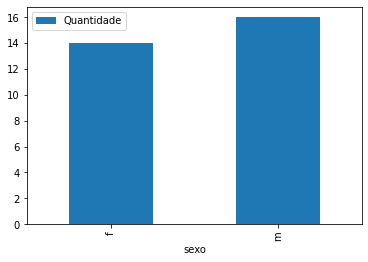

In [23]:
#exibindo o numero de mulheres e homens 
cadastro_df[['sexo','Quantidade']].groupby('sexo').sum().plot(kind="bar")

3 - Qual a idade média dos homens e das mulheres

In [26]:
df_media = cadastro_df[['sexo','idade','Quantidade']].groupby('sexo').sum()
df_media['idade'] / df_media['Quantidade']

sexo
f    33.857143
m    31.750000
dtype: float64

4 - Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro

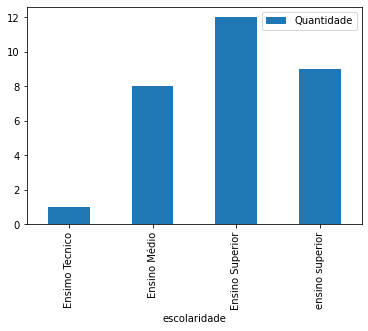

In [30]:
# Renomeando para efetuar uma coleta de informação correta
cadastro_df["escolaridade"].loc[cadastro_df["escolaridade"] == "ensino médio"] = "Ensino Médio"
cadastro_df["escolaridade"].loc[cadastro_df["escolaridade"] == "ensino Médio"] = "Ensino Médio"
cadastro_df[['escolaridade','Quantidade']].groupby('escolaridade').sum().plot(kind="bar")

5 - Mostre a Média Salarial do cadastro

Média Salarial:  4463.33


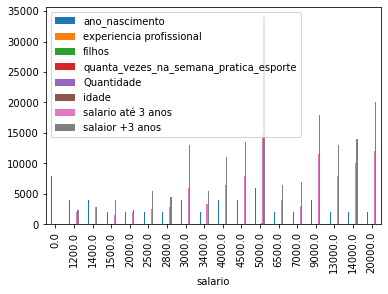

In [46]:
# Agrupando informações das tabelass
df_salario_profissao = cadastro_df.merge(salario_df, left_on='profissão', right_on='Profissões')
df_salario_profissao['salario'] = df_salario_profissao["salario até 3 anos"].loc[df_salario_profissao["experiencia profissional"] <= 3]
df_salario_profissao['salario'] = df_salario_profissao['salario'].fillna(df_salario_profissao["salaior +3 anos"])
df_salario_profissao.groupby('salario').sum().plot(kind="bar")
print("Média Salarial: ",round(df_salario_profissao['salario'].sum() / cadastro_df['Quantidade'].sum(),2))

6 - Quem tem o maior salário 

In [55]:
#Exibindo o maior salario
maior_salario = max(df_salario_profissao["salario"])
df_salario_profissao.loc[df_salario_profissao["salario"] == maior_salario]
print(maior_salario)

20000.0


7 - Tirando desempregado quem recebe menos

In [56]:
#Menor salario
menor_salario = min(df_salario_profissao["salario"].loc[df_salario_profissao["salario"] > 0])
df_salario_profissao.loc[df_salario_profissao["salario"] == menor_salario]
print(menor_salario)

1200.0


8 - Quantas pessoas gostam de caminhar no final de semana

In [60]:
# Pessoas que fazem caminhada
#Exibindo informações 
total_pessoas = cadastro_df["lazer_final_de_semana"].str.contains("caminhar").count()
print(f"Pessoas que caminham: {total_pessoas}")

Pessoas que caminham; 30


9 - Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte 

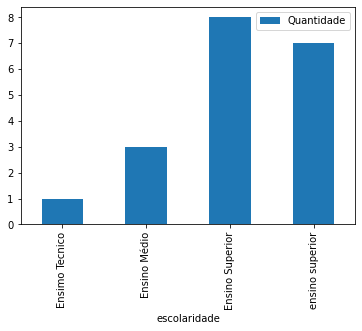

In [109]:
#Escolaridade x Pratica esporte 
cadastro_df[['pratica_esporte','escolaridade','Quantidade']].loc[cadastro_df["pratica_esporte"] == 'sim'].groupby('escolaridade').sum().plot(kind="bar")

10 - Crie um mapa de calor

11 - Mostre de forma gráfica a distribuição de estados do cadastro

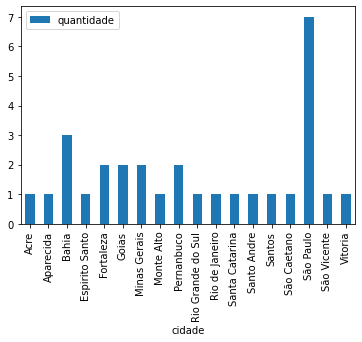

In [70]:
#Distribuição cidade
df_cadastro[['cidade','quantidade']].groupby('cidade').sum().plot(kind="bar")